# Using the qiskit interface of the mGST

In this notebook we will generate random sequences of gates, create qiskit circuits from them, and simulate them on a qiskit simulator.
Then we estimate the gates.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mGST import qiskit_interface
from qiskit.circuit.library import RXGate, RYGate, RZZGate, IGate
from reporting import job_counts_to_mGST_format

In [3]:
# Example usage with RX, RY, and RZZ gates
rx_pi_2 = RXGate(np.pi / 2)
rx_pi = RXGate(np.pi)
ry_pi_2 = RYGate(np.pi / 2)
ry_pi = RYGate(np.pi)
rzz_pi_2 = RZZGate(np.pi / 2)
idle_gate = IGate()

gate_set = [idle_gate, rx_pi_2, ry_pi_2, rx_pi, ry_pi]
K_true = qiskit_interface.qiskit_gate_to_operator(gate_set)

In [12]:
sequence_number = 100  # Number of sequences
shots = 1000  # Number of samples per sequences
sequence_length = 7
n_qubits = 1 # The number 
active_qubits = [0]

In [13]:
gate_sequences = qiskit_interface.get_gate_sequence(sequence_number, sequence_length, len(gate_set))
qiskit_circuits = qiskit_interface.get_qiskit_circuits(gate_sequences, gate_set, n_qubits, active_qubits)
sequence_results = qiskit_interface.simulate_circuit(qiskit_circuits, shots)

In [14]:
from qiskit_aer import Aer
simulator = Aer.get_backend("qasm_simulator")
sequence_results = simulator.run(qiskit_circuits, shots=shots).result().get_counts()

In [15]:
print(sequence_results)

[{'1 0': 469, '0 0': 531}, {'1 0': 518, '0 0': 482}, {'0 0': 493, '1 0': 507}, {'1 0': 493, '0 0': 507}, {'1 0': 507, '0 0': 493}, {'0 0': 516, '1 0': 484}, {'1 0': 491, '0 0': 509}, {'0 0': 1000}, {'1 0': 499, '0 0': 501}, {'0 0': 500, '1 0': 500}, {'1 0': 1000}, {'1 0': 464, '0 0': 536}, {'0 0': 485, '1 0': 515}, {'0 0': 501, '1 0': 499}, {'1 0': 1000}, {'0 0': 1000}, {'0 0': 512, '1 0': 488}, {'1 0': 1000}, {'1 0': 502, '0 0': 498}, {'1 0': 493, '0 0': 507}, {'1 0': 1000}, {'1 0': 517, '0 0': 483}, {'1 0': 1000}, {'1 0': 511, '0 0': 489}, {'0 0': 496, '1 0': 504}, {'0 0': 499, '1 0': 501}, {'1 0': 1000}, {'0 0': 503, '1 0': 497}, {'1 0': 1000}, {'1 0': 1000}, {'1 0': 479, '0 0': 521}, {'1 0': 478, '0 0': 522}, {'0 0': 523, '1 0': 477}, {'1 0': 513, '0 0': 487}, {'0 0': 502, '1 0': 498}, {'1 0': 1000}, {'1 0': 1000}, {'1 0': 531, '0 0': 469}, {'0 0': 501, '1 0': 499}, {'1 0': 513, '0 0': 487}, {'0 0': 1000}, {'0 0': 492, '1 0': 508}, {'1 0': 1000}, {'1 0': 499, '0 0': 501}, {'1 0': 5

Starting mGST optimization...
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.56it/s]
Success threshold not reached, attempting optimization over full data set...
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:01<00:00,  1.23s/it]
	 Convergence criterion not satisfied, try increasing max_iter or using new initializations.
	 Final objective 2.50e-1 with # of initializations: 1 in time 125.71s
Mean variation error: 0.1676637696189355


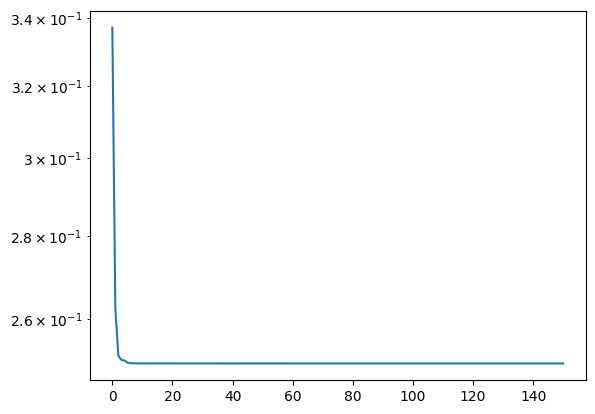

(array([[[[ 8.92364611e-03+2.13481874e-02j,
            2.89440007e-02+4.18580214e-02j],
          [-1.92610525e-02+7.26961199e-02j,
           -7.40875400e-03+4.56144919e-02j]],
 
         [[ 6.35618961e-03+2.40503104e-02j,
           -2.58670952e-02+6.02591820e-02j],
          [-4.88164819e-02+8.98751549e-02j,
           -3.68412493e-03+5.46190789e-02j]],
 
         [[ 2.27751169e-03+2.59730581e-02j,
            9.56660887e-02+4.83035034e-02j],
          [-6.89850026e-02+1.07356656e-01j,
            1.76057040e-02+4.19821501e-02j]],
 
         [[ 9.79627284e-01-7.01401436e-02j,
            1.80960571e-02+1.99331546e-03j],
          [-3.41722703e-02-2.88632342e-03j,
            9.83004536e-01-8.82634600e-02j]]],
 
 
        [[[-2.50634197e-01-4.38669604e-02j,
            2.90236799e-02-3.55059588e-01j],
          [ 7.29558377e-05-2.17601145e-01j,
           -1.66518498e-01-3.66741429e-02j]],
 
         [[-2.01778582e-01-5.10958748e-02j,
           -1.61066643e-02-3.60412685e-01j],
   

In [6]:
qiskit_interface.get_gate_estimation(gate_set, gate_sequences, len(gate_set), sequence_length,
                                     sequence_results, shots)